<a href="https://colab.research.google.com/github/Raulespz/cross_validation/blob/main/Linear_SVM_applied_to_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The main idea behind support vector machines is to find a hyperplane that separates classes by determining decision boundaries that maximize the distance between classes.

#When comparing logistic regression and SVMs, one of the main differences is that the cost function for logistic regression has a cost function that decreases to zero, but rarely reaches zero. SVMs use the Hinge Loss function as a cost function to penalize misclassification. This tends to lead to better accuracy at the cost of having less sensitivity on the predicted probabilities.

#Regularization can help SVMs generalize better with future data.

#By using gaussian kernels, you transform your data space vectors into a different coordinate system, and may have better chances of finding a hyperplane that classifies well your data.SVMs with RBFs Kernels are slow to train with data sets that are large or have many features.



In [ ]:
#Linear SVM: the Syntax
# code:
#First I have to import the class containing the classification method
# from sklearn.svm import LinearSVC

#Then create the instance of this library with  the tuning of the hyperparameters:
# LinSVC = LinearSVC(penalty='12', C=10.0), in this case "penalty" and "C" are the hyperparameters to tuning this model we could change and se if we obtain the best results.

#Now, Fit the instance in the training data on the data and then predict the expected value:
#LinSVC = LinSVC.fit(x_train, y_train)
#pred = LinSVC.predict(x_test)

# NOTA HERE I HAVE TO TUNE REGULARIZATION PARAMETERS WITH CROSS-VALIDATION.
# use LinearSVM for regression.

In [ ]:
#Another Method of Vector Machine SVMs with Kernels: The syntax,

#Import the class containing the classification method
# from sklearn.svm import SVC

#Create an instance from this library and the hyperparameters
# rbfSVC = SVC(kernel='rbf', gamma=1.0, C=10.0)

#Thwn fit to our project to the training x and y:
# rbfSVC = rbfSVC.fit(x_train, y_train)

# Then finaly create the prediction ofthis training data to our x test:
# y_pred = rbfSVC.predict(x_test)

# Tune Kernel and associated PARAMETERS WITH CROSS-VALIDATION.

In [ ]:
# MACHINE LEARNING WORKFLOW

#FEATURES                               DATA                                   MODEL CHOICE
#Many (around 10k features)       -small(1k rows)                -Simple, Logistic or LinearSVC
#Few(<100 Features)           - Medium (around 10k rows )      -SVC with RBF
#Few(<100 Features)           - Many(>100k Points)              - Add features, logistic, LinearSVC, or Kernel Approx.

In [ ]:
# FASTER KERNEL TRANSFORMATIONS: The syntax

#Import the class containing the classification method
# from sklearn.kernel_approximation import Nystroem

#Create and instance of the class
# NystroemSVC = Nystroem (kernel = 'rbf', gamma=1.0, n_components=100)

#Fit the instance on the data to transform
# x_train = NystroemSVC.fit_transform(x_train)
#x_test = NystroemSVC.transform(x_test)


# Tune Kernel and associated PARAMETERS WITH CROSS-VALIDATION.

In [ ]:
# FASTER KERNEL TRANSFORMATIONS: The syntax

#Import the class containing the classification method
# from sklearn.kernel_approximation import RBFsampler

#Create and instance of the class
# rbfSampler = RBFsampler (gamma=1.0, n_components=100)

#Fit the instance on the data to transform
# x_train = rbfSampler.fit_transform(x_train)
# x_test = rbfSampler.transform(x_test)


# Tune Kernel and associated PARAMETERS WITH CROSS-VALIDATION.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/1DataMLClassification/Wine_Quality_Data.csv')
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [ ]:
print(data)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [ ]:
import os, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# from colorsetup import colors, palette
# sns.set_palette(palette)

In [ ]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1]) #[:-1] means every column except the last column that is color that we want to predict and we want that be our y
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

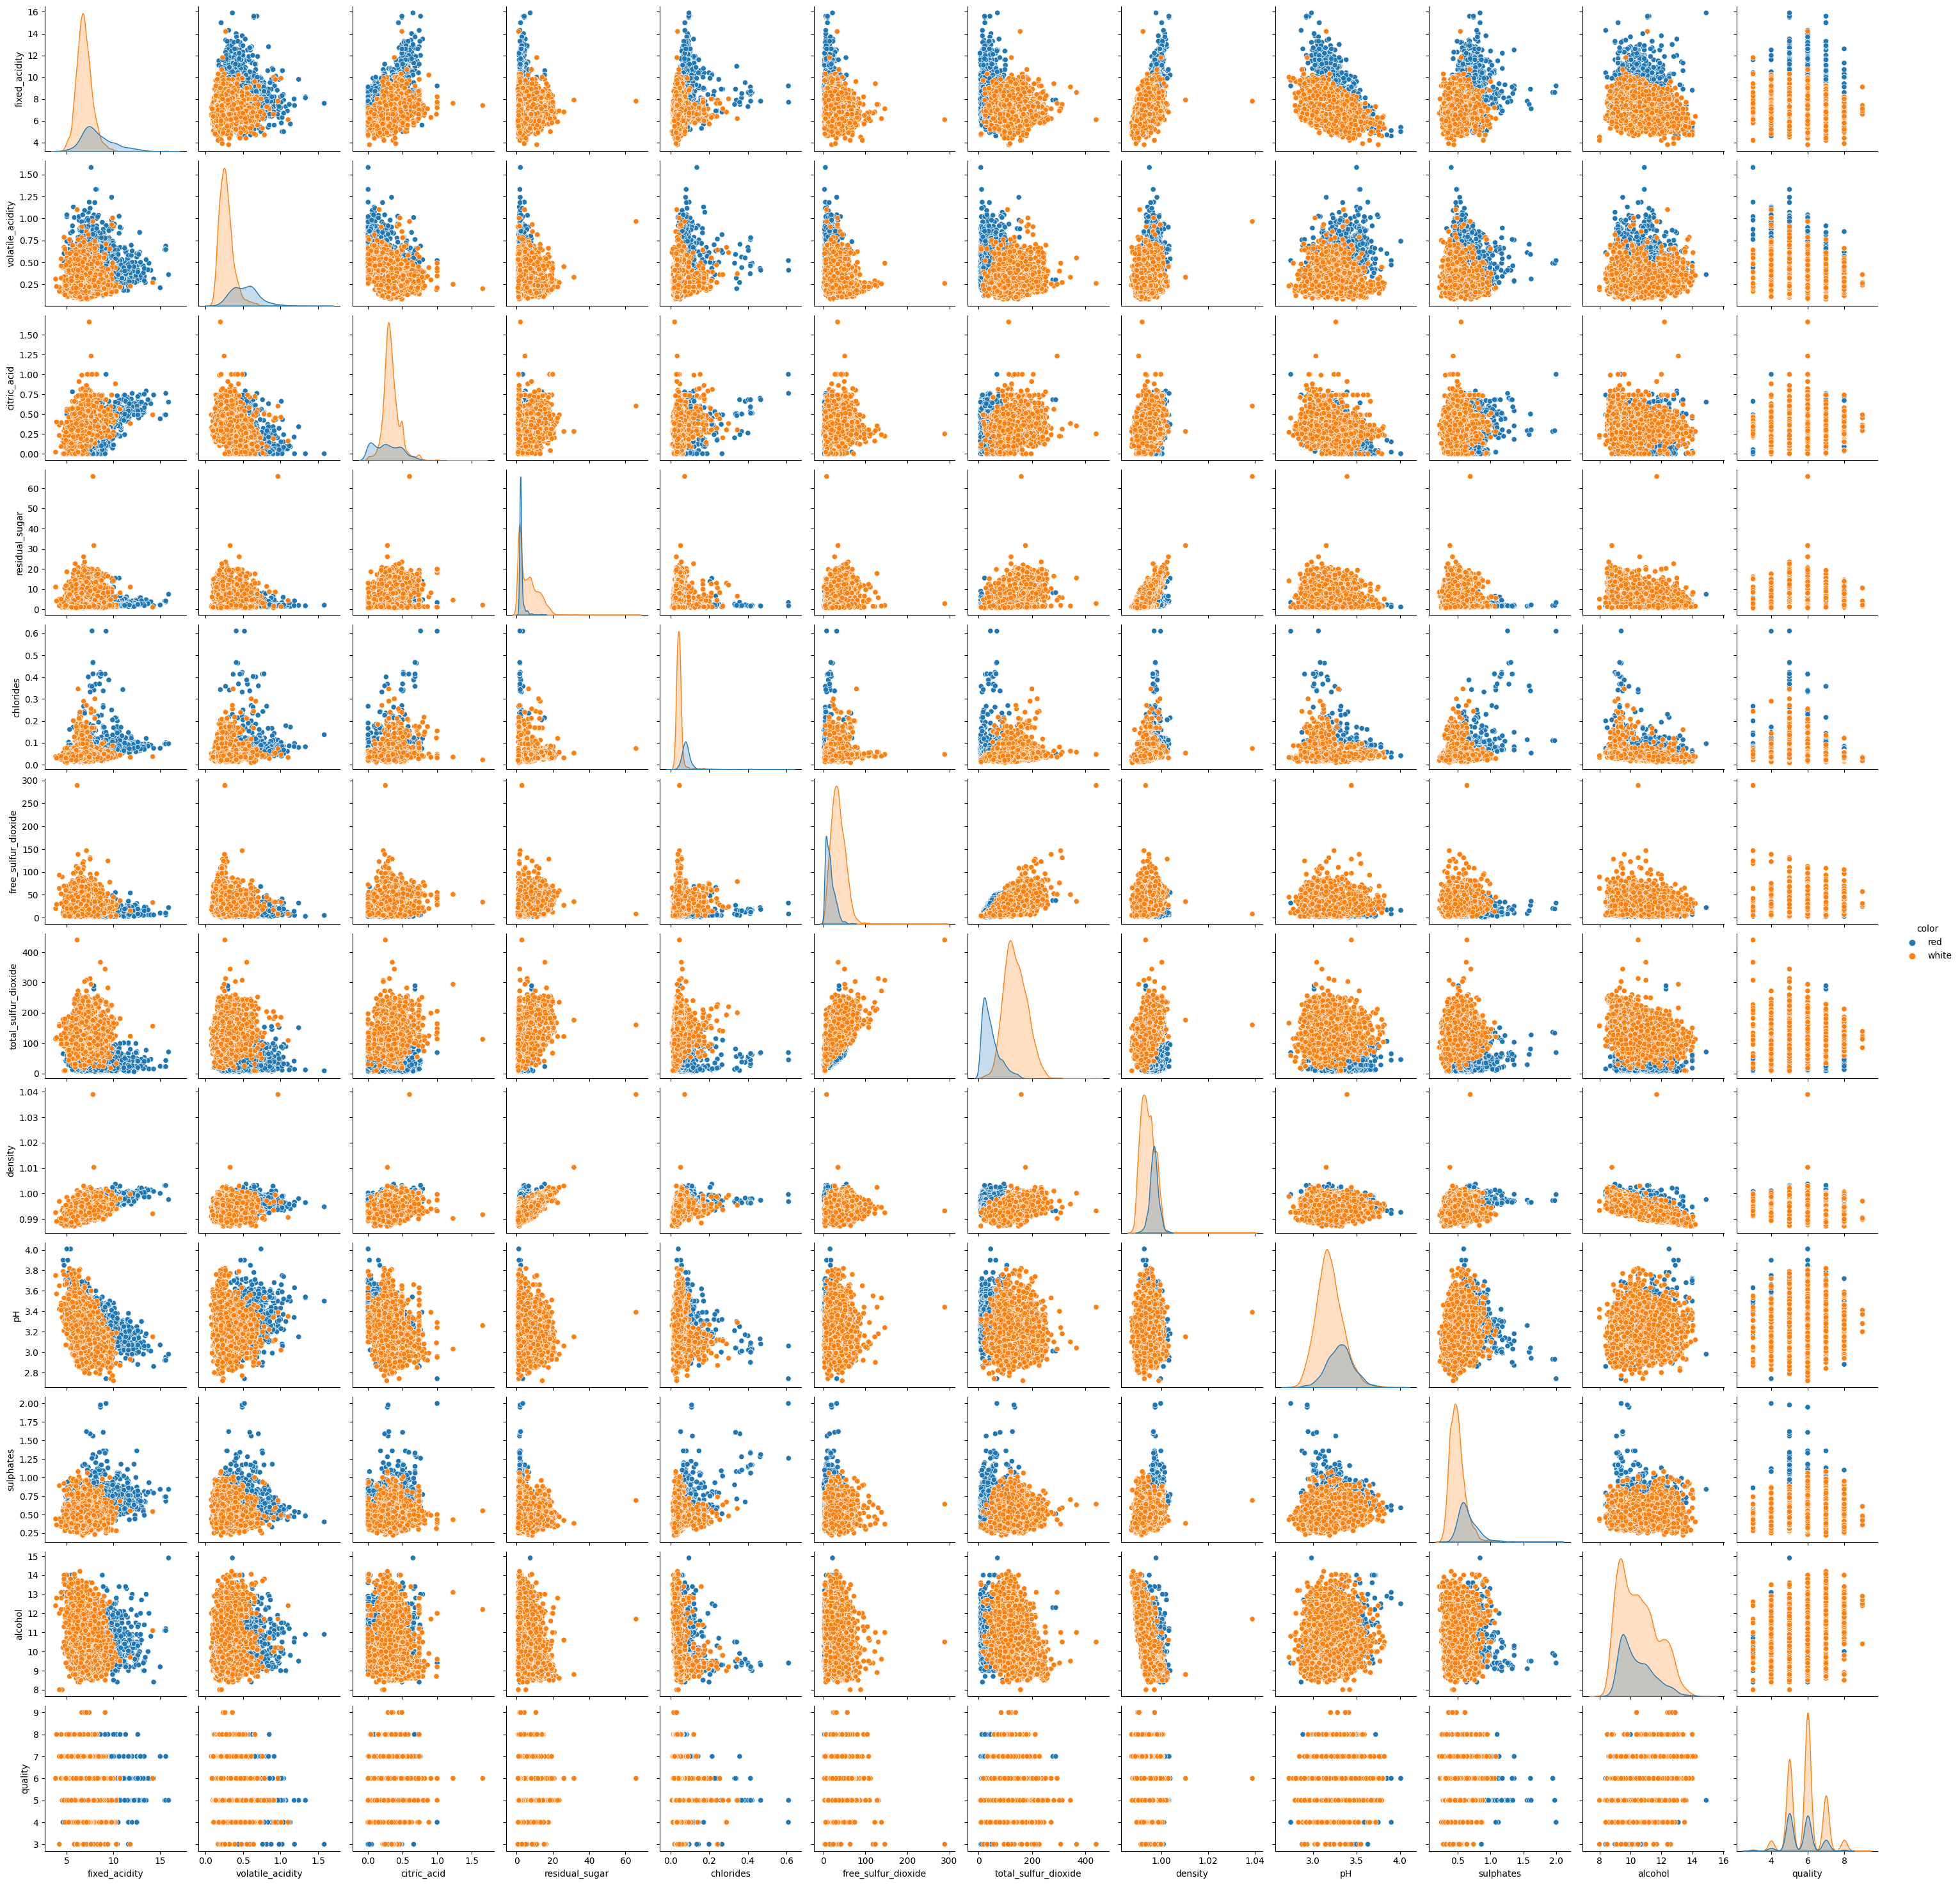

In [ ]:
sns.pairplot(data, hue='color')

[(-1.0, 1.0), Text(0, 0.5, 'pearson correlation')]

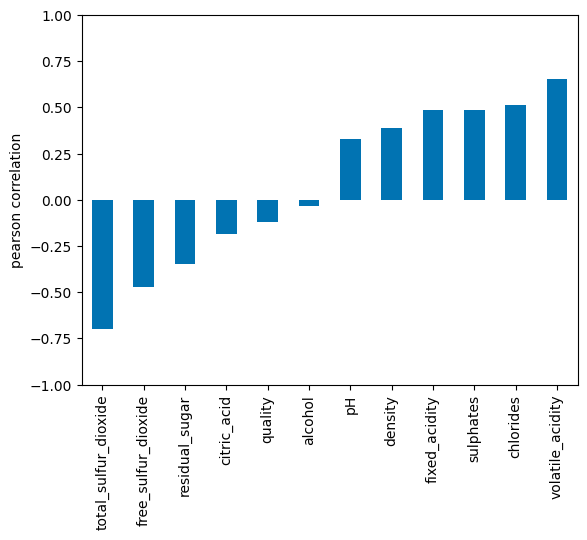

In [ ]:
sns.set_palette("colorblind")  # You can choose different palettes like "deep", "bright", "pastel", etc.

# Use the colors from the palette
colors = sns.color_palette()

ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation')

In [ ]:
correlations.map(abs).sort_values().iloc[-2:].index    #correlations: This likely refers to a pandas DataFrame or Series object containing correlation values between variables.
#.map(abs): This applies the absolute value function (abs()) to each element of the correlations object. This step is used to convert any negative correlation values to positive values while preserving the magnitude.

#.sort_values(): This sorts the correlation values in ascending order. By default, this operation will sort the values along the axis specified (either rows or columns, depending on the structure of the DataFrame or Series). The resulting object will be sorted from the lowest correlation value to the highest.

#.iloc[-2:]: This selects the last two rows of the sorted correlation values. The .iloc indexer is used to access specific rows or columns by their integer-based positions. In this case, [-2:] indicates the range from the second-to-last row to the last row. By doing this, you'll obtain the two highest correlation values in the sorted list.

#In summary, the given line of code takes the correlations object, co

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')

In [ ]:
correlations.map(abs)

total_sulfur_dioxide    0.700357
free_sulfur_dioxide     0.471644
residual_sugar          0.348821
citric_acid             0.187397
quality                 0.119323
alcohol                 0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [ ]:
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [ ]:
correlations.map(abs).sort_values().iloc[-2:]

volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]# this line gives me the values of the rows of the columns of this two important columns that have the correlation with out y.
scaler = MinMaxScaler() #MinMaxScaler() is a preprocessing transformation commonly used in machine learning and data analysis to scale numeric features within a specific range. It applies a linear transformation to each feature, scaling it to a given range, usually between 0 and 1.
X = scaler.fit_transform(X) #fit_transform(X) transform our data to 1 to 0 taking into a consideration the scaler.
print(X)
#X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
#print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
[[0.41333333 0.06451613]
 [0.53333333 0.140553  ]
 [0.45333333 0.11059908]
 ...
 [0.10666667 0.24193548]
 [0.14       0.23963134]
 [0.08666667 0.21198157]]


In [ ]:
from sklearn.svm import LinearSVC
import numpy as np

LSVC = LinearSVC()
LSVC.fit(X, y)
#print(t)

import numpy as np

# Assuming X is a multi-dimensional array
reshaped_X = X.flatten()  # Reshape to 1-dimensional

x_color = np.random.choice(reshaped_X, size=300, replace=False)
x_color = y.loc[x_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    x_color.iloc[:, 0], x_color.iloc[:, 1],
    color=y_color, alpha=1)

#---------------------

x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx_ravel()
yy_ravel = yy_ravel()
x_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(x_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autemn_r, alpha=.3)

#------------------------

ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

NameError: ignored

In [ ]:
def plot_decision_boundary(estimator, X, y):
  estimator.fit(X, y)
  x_color = X.sample(300)
  y_color = y.loc[x_color.index]
  y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
  x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
  xx, yy = np.meshgrid(x_axis, y_axis)
  xx_ravel = xx_ravel()
  yy_ravel = yy_ravel()
  x_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
  y_grid_predictions = estimator.predict(x_grid)
  y_grid_predictions = y_grid_predictions.reshape(xx.shape)

  fig, ax = plt.subplots(figsize=(10, 10))
  ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autemn_r, alpha=.3)
  ax.scatter(x_color.iloc[:, 0], x_color.iloc[:, 1], color=y_color, alpha=1)

  ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    title=str(estimator));

In [ ]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
  SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
  plot_decision_boundary(SVC_Gaussian, X, y)

AttributeError: ignored

In [ ]:
import numpy as np
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]

def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    indices = np.random.choice(np.arange(len(X)), size=300, replace=False)
    x_color = X[indices]
    y_color = y[indices]
    y_color = np.where(y_color == 1, 'red', 'yellow')

    # Rest of your plotting code here

for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

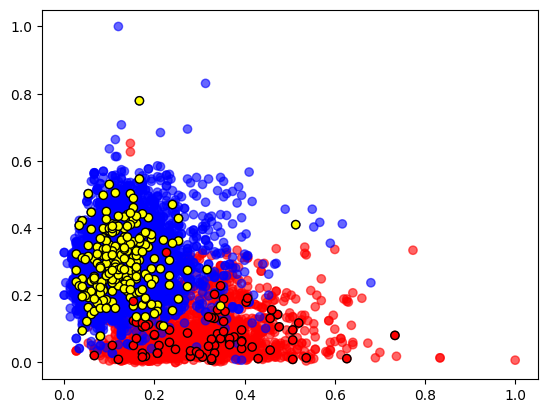

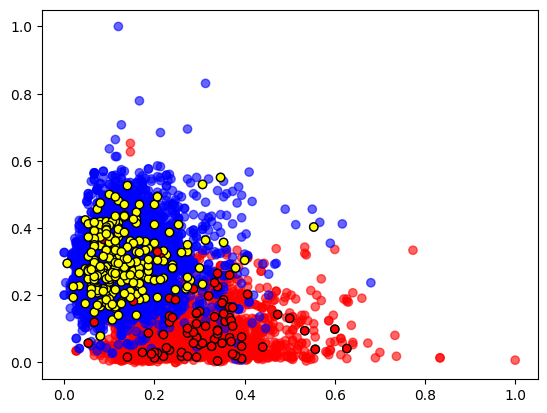

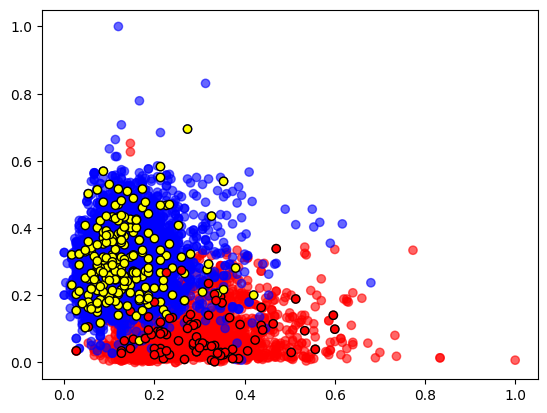

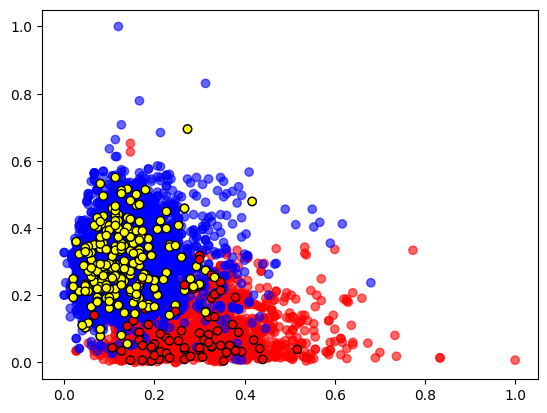

In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

gammas = [0.5, 1, 2, 10]

def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    indices = np.random.choice(np.arange(len(X)), size=300, replace=False)
    x_color = X[indices]
    y_color = y[indices]
    y_color = np.where(y_color == 1, 'red', 'yellow')

    # Rest of your plotting code here
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
    plt.scatter(x_color[:, 0], x_color[:, 1], c=y_color, edgecolors='black', linewidths=1)

    # Additional customization of the plot
    # ...

    plt.show()

for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [ ]:
Cs = [.1, 1, 10]
for C in Cs:
  SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
  plot_decision_boundary(SVC_Gaussian, X, y)